In [ ]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


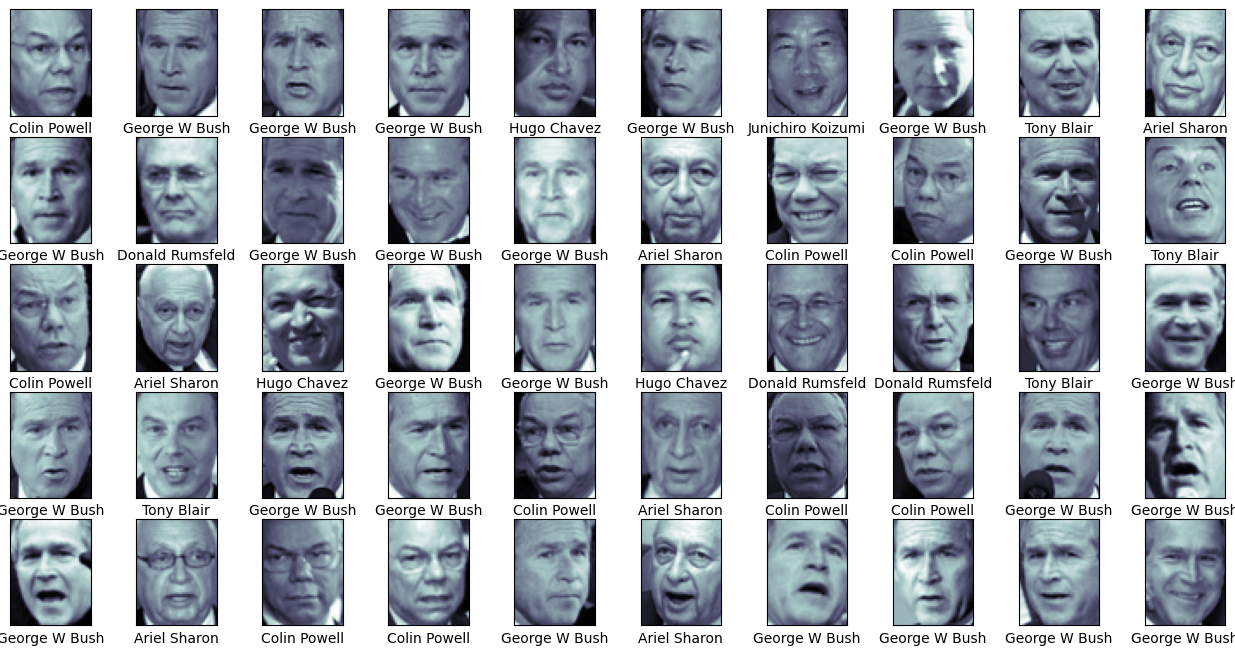

In [ ]:
import matplotlib.pyplot as plt # Import the pyplot module from matplotlib and give it the alias plt

fig, ax = plt.subplots(5, 10, figsize=(16, 8)) # Now plt is defined and subplots can be accessed
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

In [ ]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

PCA = PCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(PCA, svc)

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1,5,10,15], # Changed 'svc_c' to 'svc__C'
              'svc__gamma': [0.0001, 0.001, 0.1]} # Changed 'svc_gamma' to 'svc__gamma'
grid = GridSearchCV(model, param_grid)

# Removed the extra space before '%time'
%time grid.fit(faces.data, faces.target) # Changed Xtrain, Ytrain to faces.data, faces.target
print(grid.best_params_)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


CPU times: user 1min 34s, sys: 23.5 s, total: 1min 57s
Wall time: 1min 17s
{'svc__C': 15, 'svc__gamma': 0.001}


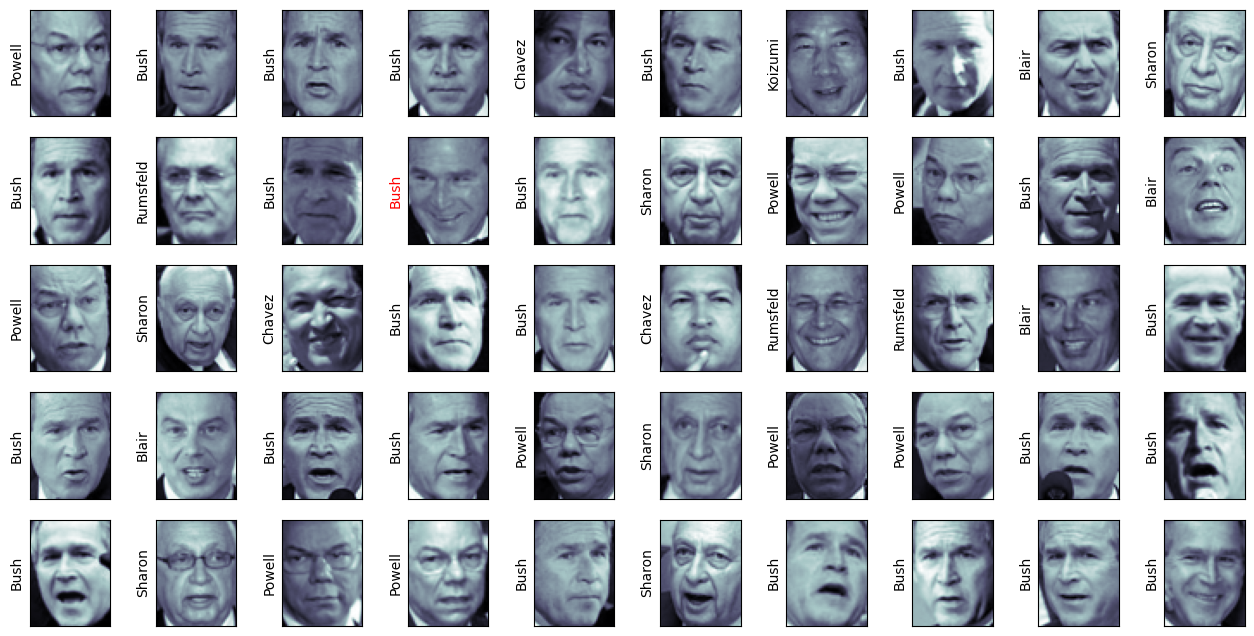

In [ ]:
yfit = grid.predict(faces.data)

fig, ax = plt.subplots(5, 10, figsize=(16, 8))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[faces.target[i]].split()[-1],
                   color='black' if yfit[i] == faces.target[i] else 'red')

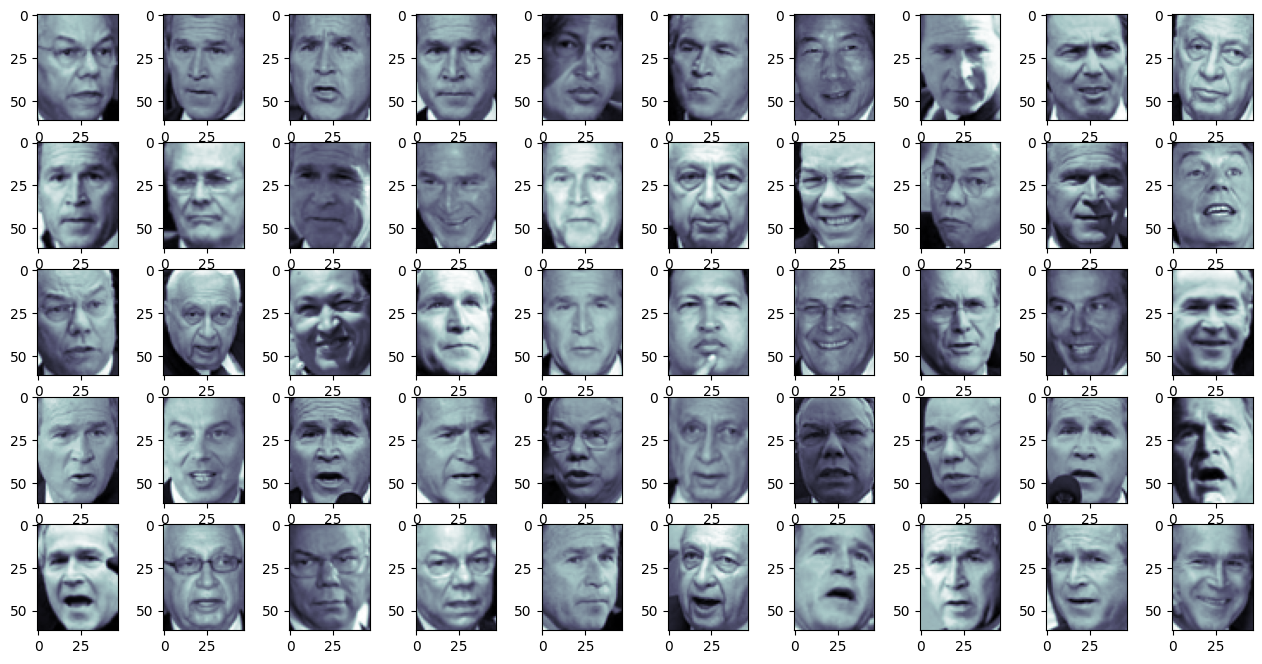

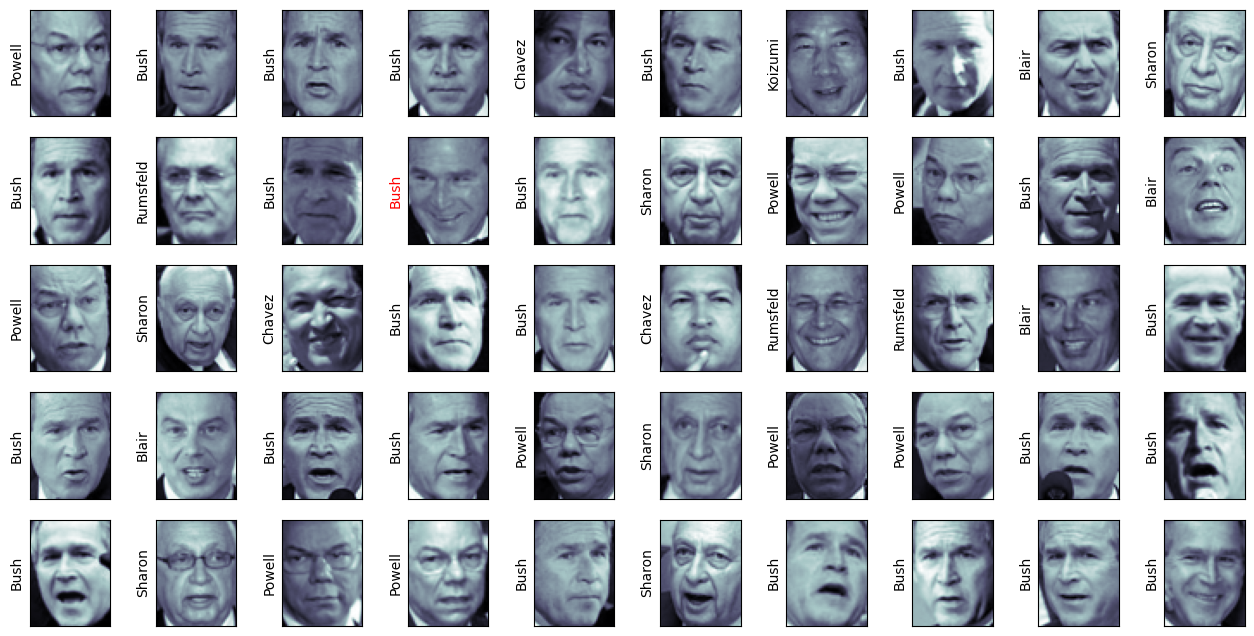

In [ ]:
fig, ax = plt.subplots(5, 10, figsize=(16, 8))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
fig, ax = plt.subplots(5, 10, figsize=(16, 8))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[faces.target[i]].split()[-1],
                   color='black' if yfit[i] == faces.target[i] else 'red')


In [ ]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(faces.target, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.97      1.00      0.99        77
     Colin Powell       0.97      0.99      0.98       236
  Donald Rumsfeld       1.00      1.00      1.00       121
    George W Bush       1.00      0.98      0.99       530
Gerhard Schroeder       0.98      1.00      0.99       109
      Hugo Chavez       1.00      1.00      1.00        71
Junichiro Koizumi       1.00      1.00      1.00        60
       Tony Blair       1.00      1.00      1.00       144

         accuracy                           0.99      1348
        macro avg       0.99      1.00      0.99      1348
     weighted avg       0.99      0.99      0.99      1348

